1.  *Consider a three-month ($T=0.25$) call option with a strike of 45 on a stock that is now trading at 50.  Assume the annual continuously compounded risk-free rate is $r_f = 0.04$ and the annual volatility of the stock is $\sigma=0.3$.  Assume the stock will not pay a dividend before the option matures ($q=0$).*

(a) *Price the option using a two-period binomial model calibrated to the data given.*

In [4]:
import numpy as np 

dt = 0.25 / 2
rf = np.exp(0.04*dt) - 1
ru = np.exp(0.3*np.sqrt(dt)) - 1
rd = 1/(1+ru) - 1

S = 50
K = 45

stock = np.array(
    [S*(1+rd)**2, S, S*(1+ru)**2]
)
call = np.maximum(stock-K, 0)
p = (rf-rd) / (ru-rd)

expected_call = np.array(
    [(1-p)*call[0] + p*call[1], (1-p)*call[1] + p*call[2]]
)
call = expected_call / (1+rf)

expected_call = (1-p)*call[0] + p*call[1]
call = expected_call / (1+rf)

print(f"Value of call from binomial model is ${call:.2f}")

Value of call is $6.59


(b) *Compute the value of the option using the Black-Scholes formula.*

In [6]:
from scipy.stats import norm 

def BS_call(S, K, T, sigma, r, q=0):
    d1 = np.log(S/K) + (r-q+0.5*sigma**2)*T
    d1 /= sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    N1 = norm.cdf(d1)
    N2 = norm.cdf(d2)
    return np.exp(-q*T)*S*N1 - np.exp(-r*T)*K*N2

call = BS_call(S, K, 0.25, 0.3, 0.04)

print(f"Value of call from Black-Scholes model is ${call:.2f}")

Value of call from Black-Scholes model is $6.34


(c) *Using the Black-Scholes formula, plot the value of the option as a function of $\sigma$ for $\sigma$ varying between 0.1 and 0.6.* 

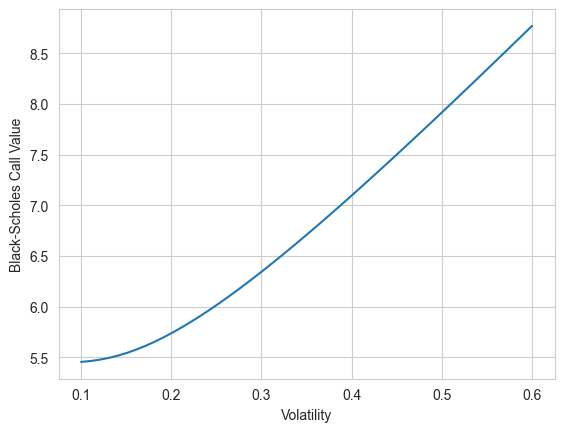

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

grid = np.linspace(0.1, 0.6, 50)
call = [BS_call(S, K, 0.25, sigma, 0.04) for sigma in grid]
plt.plot(grid, call)
plt.xlabel("Volatility")
plt.ylabel("Black-Scholes Call Value")
plt.show()

(d) *Assume the market price (premium) of the option is 7.10.  For what value of $\sigma$ is the Black-Scholes formula equal to 7.10?  (This is the implied volatility).*

In [ ]:
from scipy.optimize import fsolve 

f = lambda x: BS_call(S, K, 0.25, x, 0.04) - 7.1
sigma = fsolve(f, 0.3)
print(f"Implied vol is {sigma.item():.2%}")

Implied vol is 40.04%


2.  *Get CME gold futures settlement prices from the [CME's website](https://www.cmegroup.com/markets/metals/precious/gold.settlements.html).  How much higher is the Feb 2025 futures price than the Feb 2024 futures price in percentage terms?  It should be approximately the same as the one-year interest rate.  Get the one-year interest rate from the [U.S. Treasury's website](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value_month=202401) and check that they are roughly the same.*

On 2/5/2023, the Feb 2025 contract settled at 2129.7 and the Feb 2024 contract settled at 2025.9.  This implies an interest rate of 2129.7/2025.9 - 1 = 5.12%.  On 1/31/2023, the one-year Treasury rate was 4.73%.

3.  *Get adjusted closing prices for SPY, SPXL, and SPXS from Yahoo finance and compute daily returns.  Drop NaNs so that you have the same time period for all three.  SPXL is a three-times levered version of SPY and SPXS is a three-times levered *short* version of SPY.  Both are created using futures contracts on the S&P 500.*

In [15]:
import yfinance as yf 

prices = yf.download(("SPY", "SPXL", "SPXS"), start=1970, progress=False)
rets = prices["Adj Close"].pct_change().dropna()

(a) *Create a scatter plot with SPXL returns on the y-axis and SPY returns on the x-axis and do the same for SPYXS.  Run regressions of SPXL returns on SPY returns and of SPYXS returns on SPY returns.  What are the slopes of the regression lines?*

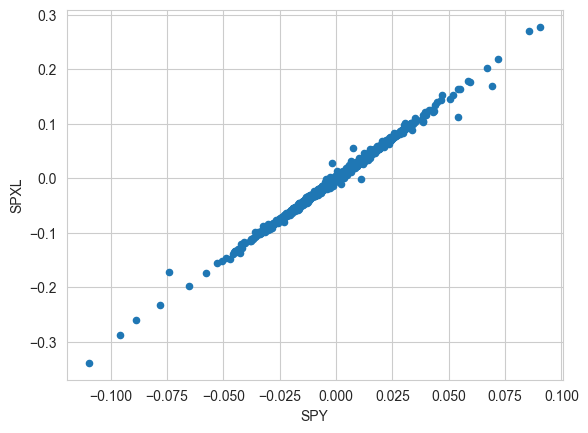

In [23]:
rets.plot(x="SPY", y="SPXL", kind="scatter")
plt.show()

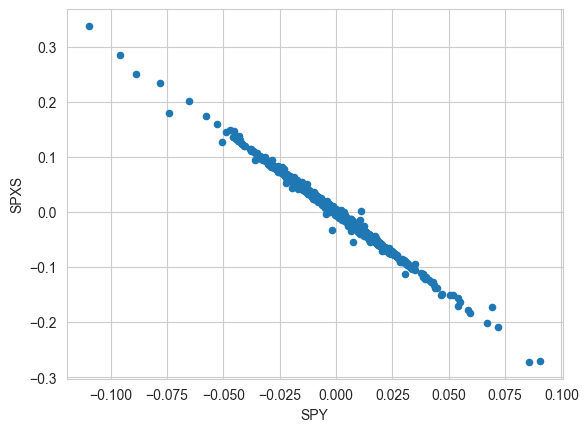

In [24]:
rets.plot(x="SPY", y="SPXS", kind="scatter")
plt.show()

In [31]:
import statsmodels.formula.api as smf 

model = smf.ols("SPXL ~ SPY", rets)
slope = model.fit().params["SPY"]
print(f"The slope of the regression line of SPXL on SPY is {slope:.2f}.")

model = smf.ols("SPXS ~ SPY", rets)
slope = model.fit().params["SPY"]
print(f"The slope of the regression line of SPXS on SPY is {slope:.2f}.")

The slope of the regression line of SPXL on SPY is 2.98.
The slope of the regression line of SPXS on SPY is -2.99.


(b) *Do the total compound returns $(1+r_1)\cdots(1+r_T)-1$ of SPXL compared to SPY and SPXS compared to SPY match the relationships you found in (a)?*

In [35]:
total_rets = (1+rets).prod() - 1
print(total_rets.round(2))

SPXL    58.94
SPXS    -1.00
SPY      7.11
dtype: float64


No.  SPY made 711%, SPXL made 5,894%, and SPXS lost 100%.

(c) *Plot the accumulations $(1+r_1)\cdots(1+r_T)$ for the three funds.*  

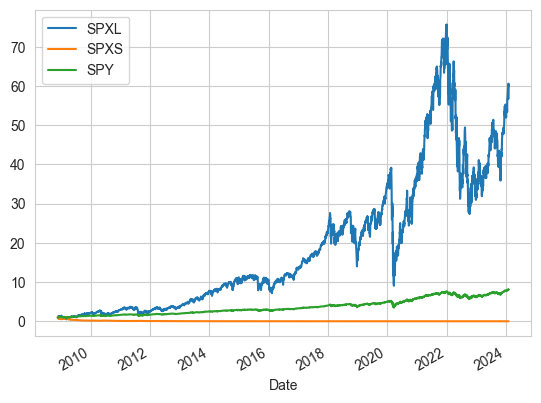

In [34]:
(1+rets).cumprod().plot()
plt.show()